In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np  
from sklearn.cluster import KMeans

In [4]:
image_path = '../output_videos/cropped_img.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


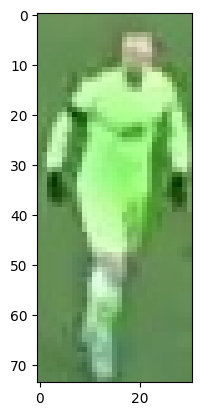

In [6]:
plt.imshow(image)

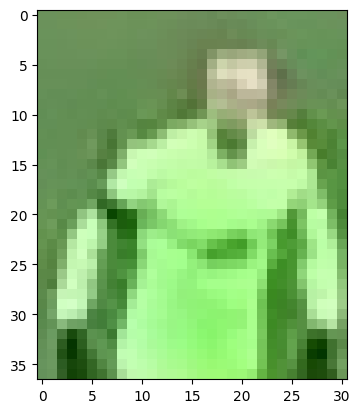

In [7]:
#Take the top half of the image
top_half = image[:image.shape[0] // 2, :, :]
plt.imshow(top_half)

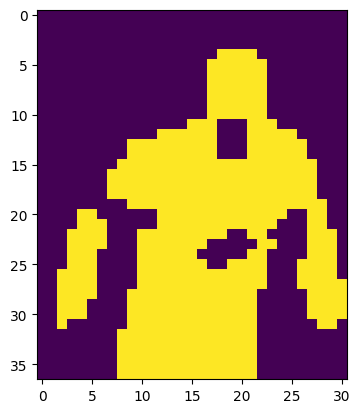

In [12]:
image_2d=top_half.reshape(-1, 3)
kmeans=KMeans(n_clusters=2, random_state=0).fit(image_2d)
labels=kmeans.labels_
clustered_image=labels.reshape(top_half.shape[0], top_half.shape[1])
plt.imshow(clustered_image)


In [16]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster=max(set(corner_clusters), key=corner_clusters.count) 
print(non_player_cluster)

0


In [17]:
player_cluster=1-non_player_cluster
print(player_cluster)

1


In [18]:
kmeans.cluster_centers_[player_cluster]

array([173.03333333, 237.90625   , 148.04583333])